# Generate some random data

(100, 1) 0.46360659509514174


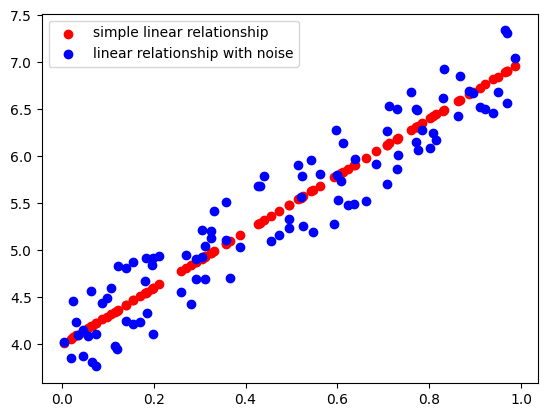

In [281]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = np.random.rand(m, 1)
print(X.shape, X.mean())

Y_naive = 3 * X + 4

# np.random.rand(m, 1) generates a random array with shape (m, 1) containing elements
# uniformly distributed between [0, 1)
Y = Y_naive + (np.random.rand(m, 1) - 0.5)

plt.scatter(X, Y_naive, c='red', label='simple linear relationship')
plt.scatter(X, Y, c='blue', label='linear relationship with noise')
plt.legend(loc="upper left")

plt.show()

# Training Linear Regression models

## Using batch GD

In [269]:
# np.random.seed(42)

epoch_cnt = 200
theta = np.random.rand(2, 1) # intercept, slope
alpha = 0.01 # Learning rate

# Add a new feature to X for bias term
X_b = np.array([(1, x[0]) for x in X]).T
print(X_b.shape)

grads = []
thetas = []
epochs = []

for e in range(epoch_cnt):
    y_hat = theta.T @ X_b
    grad = (2/m) * (y_hat - Y.T) @ X_b.T
    theta = theta - alpha * grad.T

    grads.append(grad)
    thetas.append(theta)
    epochs.append(e)

grads = np.array(grads)
thetas = np.array(thetas)
epochs = np.array(epochs)

(2, 100)


## Plotting parameters

In [270]:
from matplotlib.pyplot import figure

def plot_grads_vs_epochs(epochs, grads, figsize=(3, 3)):
    figure(figsize=figsize, dpi=80)
    plt.plot(epochs, grads[::, 0, 0], label='Theta 1 grad vs epochs', c='red') # Grad of theta_1 (intercept) vs epochs
    plt.plot(epochs, grads[::, 0, 1], label='Theta 2 grad vs epochs', c='blue') # Grad of theta_1 (slope) vs epochs
    plt.xlabel("Epochs")
    plt.ylabel("Gradient")
    plt.legend(loc="lower right")
    
    plt.show()

In [271]:
from matplotlib.pyplot import figure

def plot_thetas_vs_epochs(epochs, thetas, figsize=(3, 3)):
    figure(figsize=figsize, dpi=80)
    plt.plot(epochs, thetas[::, 0, 0], label='Theta 1 (intercept) vs epochs', c='red')
    plt.plot(epochs, thetas[::, 1, 0], label='Theta 2 (slope) vs epochs', c='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Theta')
    plt.legend(loc='lower right')
    
    plt.show()

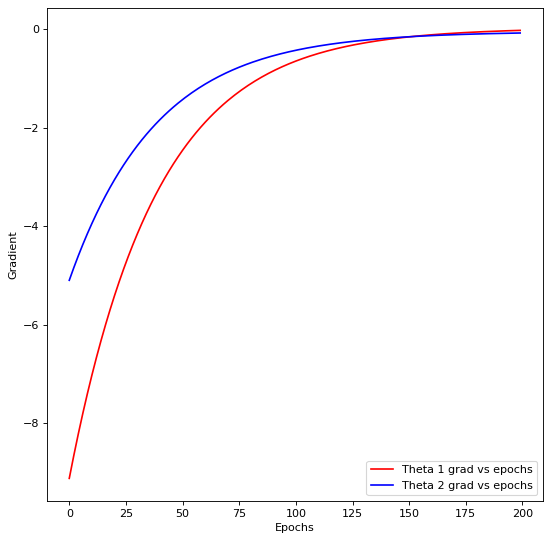

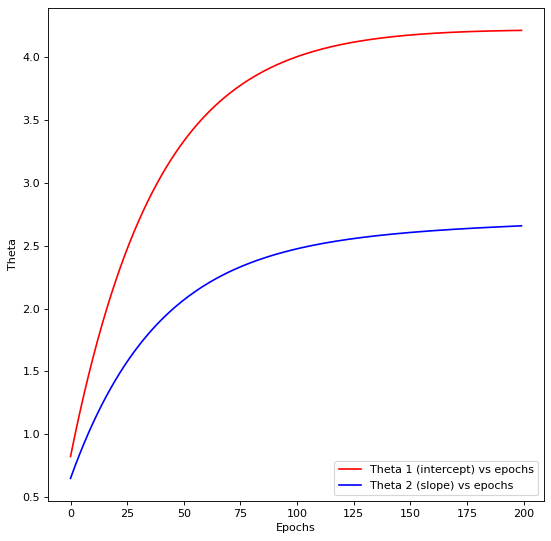

In [272]:
plot_grads_vs_epochs(epochs, grads, figsize=(8, 8))
plot_thetas_vs_epochs(epochs, thetas, figsize=(8, 8))

## Using Stochastic GD

In [289]:
import random

np.random.seed(42)

epoch_cnt = 1000
theta = np.random.rand(2, 1) # intercept, slope
alpha = 0.1 # Learning rate

# Add a new feature to X for bias term
X_b = np.array([(1, x[0]) for x in X]).T

grads = []
thetas = []
epochs = []

for e in range(epoch_cnt):
    ind = random.randint(0, m-1)
    x = X_b.T[ind].reshape(1, -1).T
    y = Y[ind].reshape(1, -1)

    y_hat = theta.T @ x
    grad = (2) * (y_hat - y.T) @ x.T
    theta = theta - alpha * grad.T

    if(e % 10 == 0):
        grads.append(grad)
        thetas.append(theta)
        epochs.append(e)

grads = np.array(grads)
thetas = np.array(thetas)
epochs = np.array(epochs)

theta

array([[4.02329161],
       [2.86033954]])

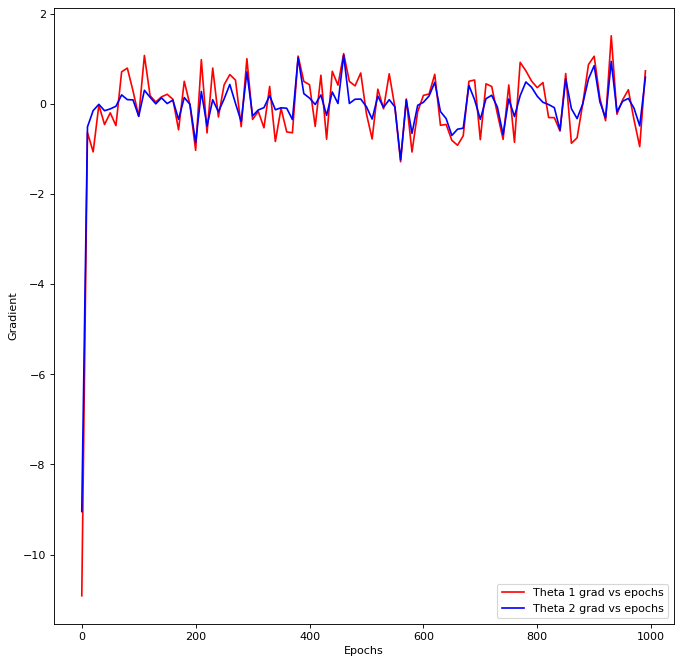

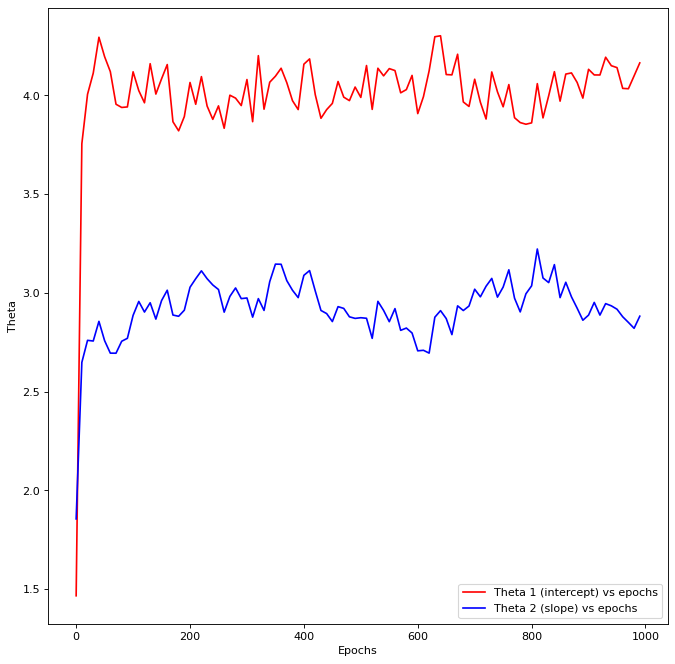

In [290]:
plot_grads_vs_epochs(epochs, grads, figsize=(10, 10))
plot_thetas_vs_epochs(epochs, thetas, figsize=(10, 10))

## Using mini-batch GD

In [353]:
import random

np.random.seed(42)

epoch_cnt = 1000
theta = np.random.rand(2, 1) # intercept, slope
alpha = 0.1 # Learning rate
batch_size = 4

# Add a new feature to X for bias term
X_b = np.array([(1, x[0]) for x in X]).T

grads = []
thetas = []
epochs = []

for e in range(epoch_cnt):
    ind = random.randint(batch_size // 2, m - max(1, batch_size // 2))
    
    low = ind-(batch_size // 2)
    hi = ind+(batch_size // 2)

    if(low == hi):
        low = ind
        hi = ind + 1
    
    x = X_b.T[low: hi].reshape(batch_size, -1).T
    y = Y[low: hi].reshape(batch_size, -1)

    y_hat = theta.T @ x
    grad = (2/batch_size) * (y_hat - y.T) @ x.T
    theta = theta - alpha * grad.T

    if(e % 5 == 0):
        grads.append(grad)
        thetas.append(theta)
        epochs.append(e)

grads = np.array(grads)
thetas = np.array(thetas)
epochs = np.array(epochs)

theta

array([[4.04813742],
       [2.98572661]])

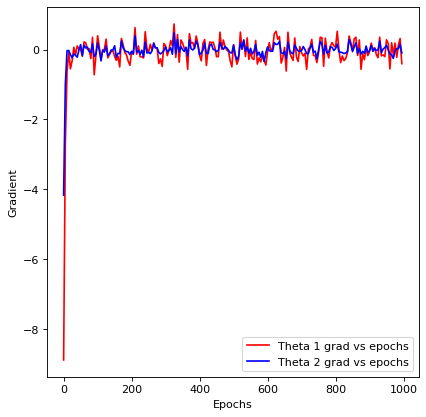

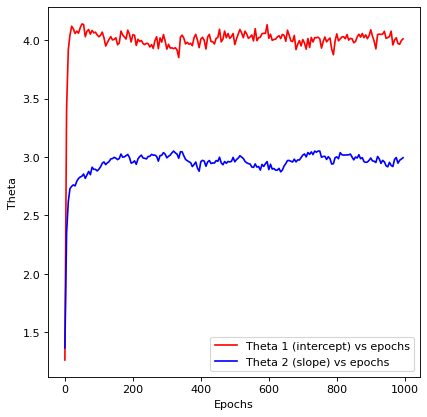

In [354]:
plot_grads_vs_epochs(epochs, grads, figsize=(6, 6))
plot_thetas_vs_epochs(epochs, thetas, figsize=(6, 6))